# Bibliotecas

In [2]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Instalação pingouin
! sudo pip install pingouin
# Instalação spicy
! sudo pip install spicy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7028 sha256=8100c86139507d030f2f4498e3fa6d9194a875ad492a40a367cf4e9674354b67
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


# Importação dos arquivos

In [3]:
upload = files.upload()

KeyboardInterrupt: ignored

# Resolução 2)

- Carregando os dados para as variaveis e concatenando as bases


In [4]:
df_2019 = pd.read_csv('vendas_linha_petshop_2019.csv', sep =';', encoding = 'latin1', decimal = ',')
df_2020 = pd.read_csv('vendas_linha_petshop_2020.csv', sep =';', encoding = 'latin1', decimal = ',')
df_2021 = pd.read_csv('vendas_linha_petshop_2021.csv', sep =';', encoding = 'latin1', decimal = ',')
df_2022 = pd.read_csv('vendas_linha_petshop_2022.csv', sep =';', encoding = 'latin1', decimal = ',')

Limpeza e normalização



In [5]:
df_2019 = df_2019.reset_index(drop=True)
df_2020 = df_2020.reset_index(drop=True)
df_2021 = df_2021.reset_index(drop=True)
df_2022 = df_2022.reset_index(drop=True)
dt_combinados = pd.concat([df_2019, df_2020, df_2021, df_2022], ignore_index=True)
dt_combinados

,cod_pedido,regiao_pais,produto,valor,quantidade,valor_total_bruto,data,estado,formapagto,centro_distribuicao,responsavelpedido,valor_comissao,lucro_liquido,categoriaprod
0,1,Norte,Biscoito True Champion 300g,22.00,2.0,44.00,13/06/2019,Acre,Dinheiro,Rapid Pink,Carlos,0.44,17.6,Alimentação
1,2,Norte,Biscoito True Champion 300g,21.00,2.0,42.00,03/01/2019,Amapá,Pix,Rapid Pink,Maria Linda,0.42,16.8,Alimentação
2,3,Norte,Biscoito True Champion 300g,22.00,NaN,44.00,18/01/2019,Pará,Boleto Bancário,Rapid Pink,Julia,0.88,35.2,Alimentação
3,4,Norte,Biscoito True Champion 300g,19.00,4.0,88.00,19/08/2019,Rondônia,Boleto Bancário,Rapid Pink,Yuri,0.76,30.4,Alimentação
4,5,Norte,Biscoito True Champion 300g,22.00,2.0,44.00,18/10/2019,Tocantins,Cartão Crédito,Rapid Pink,Dolores,0.44,17.6,Alimentação
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200781,200976,Sudeste,Bandana Disney Mickey Fábrica Petti,19.44,3.0,58.32,07/02/2022,Rio de Janeiro,Cartão Débito,Papa Léguas,Antonio,0.42,14.7,Acessório
200782,200977,Sudeste,Bandana Disney Mickey Fábrica Petti,21.06,1.0,21.06,06/02/2022,Espírito Santo,Cartão Débito,Papa Léguas,Tereza,0.26,9.1,Acessório
200783,200978,Sul,Bandana Disney Mickey Fábrica Petti,14.58,3.0,43.74,25/01/2022,Paraná,Cartão Crédito,Tree True,Beatriz,0.48,16.8,Acessório
200784,200979,Sul,Bandana Disney Mickey Fábrica Petti,16.20,2.0,32.40,27/03/2022,Santa Catarina,Pix,Tree True,Vitória,0.52,18.2,Acessório


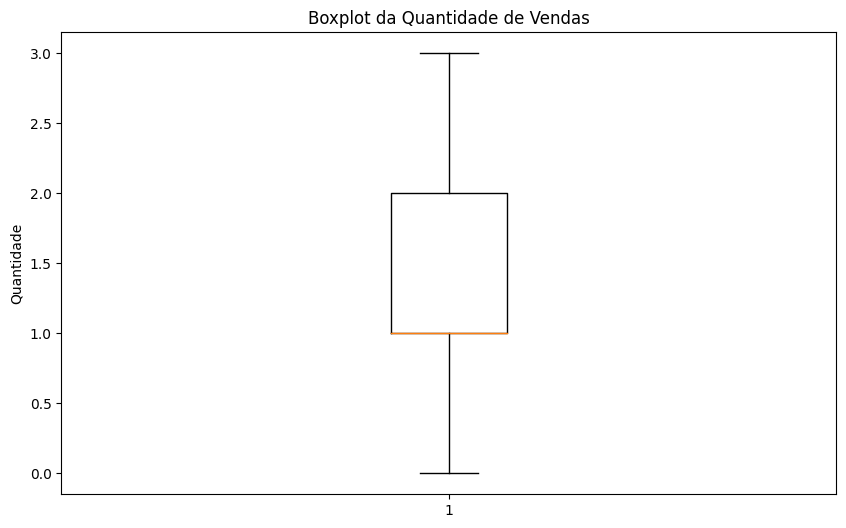

Número total de colunas: 13
Número total de linhas: 200786
Média sem outliers: 1.5779035777076404
Desvio padrão sem outliers: 0.775293556571063


In [6]:
# Verificando Missings por linhas
missings_linha = pd.DataFrame({
    'cod_pedido': dt_combinados['cod_pedido'].tolist(),
    'n_missing': dt_combinados.isna().sum(axis=1).tolist()
})

# Calcular o número total de colunas
n_colunas = dt_combinados.shape[1] - 1

# Converter a coluna 'quantidade' para valores numéricos
dt_combinados['quantidade'] = pd.to_numeric(dt_combinados['quantidade'], errors='coerce')


# Verificando missings nas colunas
missings_coluna = pd.DataFrame({
    'variaveis': dt_combinados.columns,
    'n': dt_combinados.isna().sum().values
})

# Quantidade total de linhas
n_linhas = dt_combinados.shape[0]

# Remover linhas com valores ausentes na coluna 'quantidade'
dados_sem_nans = dt_combinados.dropna(subset=['quantidade'])

# Calcular o limite superior do IQR para identificar outliers
Q1 = dados_sem_nans['quantidade'].quantile(0.25)
Q3 = dados_sem_nans['quantidade'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filtrar os dados excluindo outliers
dados_filtrados = dados_sem_nans[(dados_sem_nans['quantidade'] >= lower_limit) & (dados_sem_nans['quantidade'] <= upper_limit)]

# Calcular a média e desvio padrão após remover outliers
media_outliers = dados_filtrados['quantidade'].mean()
desvio_outliers = dados_filtrados['quantidade'].std()

# Plotar um boxplot para visualizar outliers na coluna 'quantidade'
plt.figure(figsize=(10, 6))
plt.boxplot(dados_filtrados['quantidade'])
plt.title('Boxplot da Quantidade de Vendas')
plt.ylabel('Quantidade')
plt.show()

# Imprimir estatísticas
print(f"Número total de colunas: {n_colunas}")
print(f"Número total de linhas: {n_linhas}")
print(f"Média sem outliers: {media_outliers}")
print(f"Desvio padrão sem outliers: {desvio_outliers}")


# Resolução 3)

- Estátistica Regiões

In [7]:
# Definindo média da população
media_populacao = np.mean(dt_combinados['valor'])
media_populacao

111.0890378313229

In [8]:
# Média por região
dt_combinados.groupby('regiao_pais').agg(media_preco = pd.NamedAgg('valor', 'mean'),
                                       n = pd.NamedAgg('valor', 'size'))

,media_preco,n
regiao_pais,,
Centro Oeste,111.232447,32121
Nordeste,111.096483,48205
Norte,111.104489,56198
Sudeste,111.076545,40167
Sul,110.867752,24095


In [9]:
# Separar faixas para análise
dados_centro_oeste = dt_combinados[dt_combinados['regiao_pais'] == 'Centro Oeste']['valor']
dados_nordeste = dt_combinados[dt_combinados['regiao_pais'] == 'Nordeste']['valor']
dados_norte= dt_combinados[dt_combinados['regiao_pais'] == 'Norte']['valor']
dados_sudeste = dt_combinados[dt_combinados['regiao_pais'] == 'Sudeste']['valor']
dados_sul = dt_combinados[dt_combinados['regiao_pais'] == 'Sul']['valor']

In [10]:
# Realizar teste F com o spicy
from scipy import stats as st

st.f_oneway(dados_centro_oeste,
            dados_nordeste,
            dados_norte,
            dados_sudeste,
            dados_sul)

F_onewayResult(statistic=0.010050400882370567, pvalue=0.9998006638451581)

- Estátisca forma de pagamento

In [11]:
# Definindo média da população
media_populacao = np.mean(dt_combinados['valor'])
media_populacao

111.0890378313229

In [12]:
# Média por forma de pagamento
dt_combinados.groupby('formapagto').agg(media_forma = pd.NamedAgg('valor', 'mean'),
                                       n = pd.NamedAgg('valor', 'size'))

,media_forma,n
formapagto,,
Boleto Bancário,110.585834,40281
Cartão Crédito,112.508530,40507
Cartão Débito,109.630472,40032
Dinheiro,111.478064,39792
Pix,111.230406,40174


In [13]:
# Separar faixas para análise
dados_boleto = dt_combinados[dt_combinados['formapagto'] == 'Boleto Bancário']['valor']
dados_c_credito = dt_combinados[dt_combinados['formapagto'] == 'Cartão Crédito']['valor']
dados_c_debito= dt_combinados[dt_combinados['formapagto'] == 'Cartão Débito']['valor']
dados_dinheiro = dt_combinados[dt_combinados['formapagto'] == 'Dinheiro']['valor']
dados_pix = dt_combinados[dt_combinados['formapagto'] == 'Pix']['valor']

In [14]:
# Realizar teste F com o spicy
from scipy import stats as st

st.f_oneway(dados_boleto,
            dados_c_credito,
            dados_c_debito,
            dados_dinheiro,
            dados_pix)

F_onewayResult(statistic=0.9917113482930306, pvalue=0.410514084140593)

# Resolução 4)

In [15]:
# Correlacao pearson função
pearson_corr = dt_combinados.corr(method='pearson')
pearson_corr

<ipython-input-15-03c5f8fdad56>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pearson_corr = dt_combinados.corr(method='pearson')


,cod_pedido,valor,quantidade,valor_total_bruto,valor_comissao,lucro_liquido
cod_pedido,1.000000,0.091924,-0.041393,0.001233,-0.013924,-0.024483
valor,0.091924,1.000000,-0.011868,0.061934,0.213175,0.191428
quantidade,-0.041393,-0.011868,1.000000,0.120868,0.322192,0.559976
valor_total_bruto,0.001233,0.061934,0.120868,1.000000,0.264349,0.262414
valor_comissao,-0.013924,0.213175,0.322192,0.264349,1.000000,0.888694
lucro_liquido,-0.024483,0.191428,0.559976,0.262414,0.888694,1.000000


In [ ]:
# Matriz ajustada
pearson_corr.style.background_gradient(cmap='coolwarm').set_precision(6)

<ipython-input-269-1a6ab5d97e29>:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  pearson_corr.style.background_gradient(cmap='coolwarm').set_precision(6)


,cod_pedido,valor,quantidade,valor_total_bruto,valor_comissao,lucro_liquido
cod_pedido,1.000000,0.091924,-0.041393,0.001233,-0.013924,-0.024483
valor,0.091924,1.000000,-0.011868,0.061934,0.213175,0.191428
quantidade,-0.041393,-0.011868,1.000000,0.120868,0.322192,0.559976
valor_total_bruto,0.001233,0.061934,0.120868,1.000000,0.264349,0.262414
valor_comissao,-0.013924,0.213175,0.322192,0.264349,1.000000,0.888694
lucro_liquido,-0.024483,0.191428,0.559976,0.262414,0.888694,1.000000


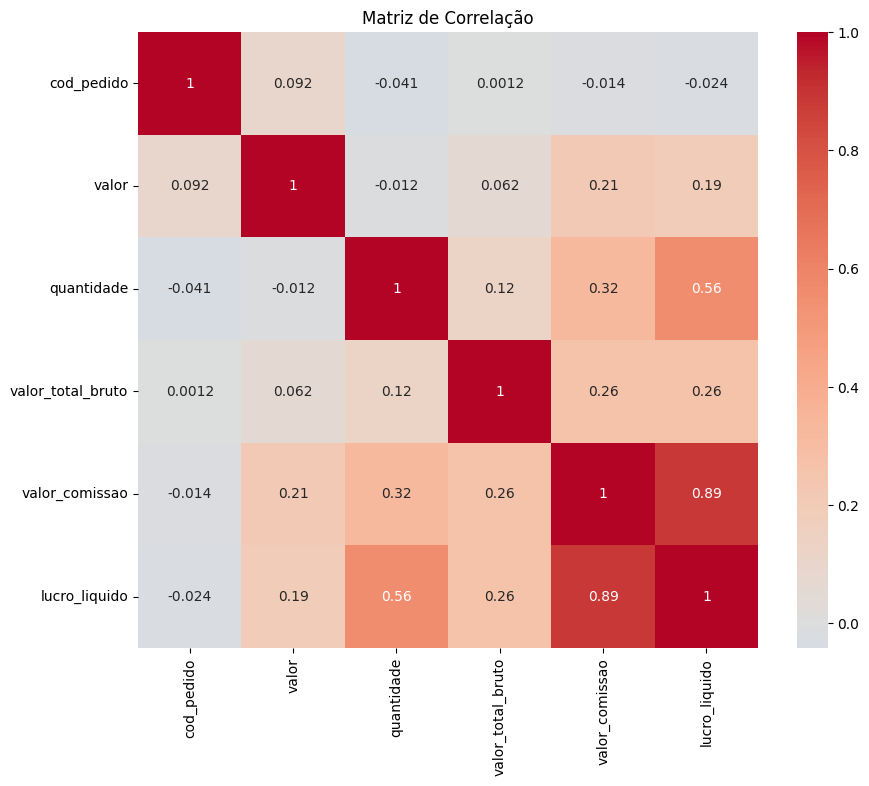

In [16]:
# Salvando a imagem
plt.figure(figsize=(10, 8))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', center=0)
plt.title("Matriz de Correlação")
plt.savefig("correlation_matrix.png")
plt.show()

In [ ]:
# Criando colunas
colunas_corr = ['cod_pedido', 'valor', 'quantidade', 'valor_total_bruto', 'valor_comissao', 'lucro_liquido']

In [ ]:
import pingouin as pg
# Refere-se ao cálculo das correlações de Pearson em pares de váriaveis
pg.pairwise_corr(dt_combinados,
                 columns=colunas_corr,
                 method='pearson')

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
0,cod_pedido,valor,pearson,two-sided,200786,0.091924,"[0.09, 0.1]",0.000000e+00,inf,1.000000
1,cod_pedido,quantidade,pearson,two-sided,200119,-0.041393,"[-0.05, -0.04]",1.303937e-76,9.216e+71,1.000000
2,cod_pedido,valor_total_bruto,pearson,two-sided,200786,0.001233,"[-0.0, 0.01]",5.806735e-01,0.003,0.085627
3,cod_pedido,valor_comissao,pearson,two-sided,200786,-0.013924,"[-0.02, -0.01]",4.393730e-10,7.945e+05,0.999991
4,cod_pedido,lucro_liquido,pearson,two-sided,200786,-0.024483,"[-0.03, -0.02]",5.211671e-28,3.869e+23,1.000000
5,valor,quantidade,pearson,two-sided,200119,-0.011868,"[-0.02, -0.01]",1.099576e-07,3705.122,0.999595
6,valor,valor_total_bruto,pearson,two-sided,200786,0.061934,"[0.06, 0.07]",7.908592e-170,1.012e+165,1.000000
7,valor,valor_comissao,pearson,two-sided,200786,0.213175,"[0.21, 0.22]",0.000000e+00,inf,1.000000
8,valor,lucro_liquido,pearson,two-sided,200786,0.191428,"[0.19, 0.2]",0.000000e+00,inf,1.000000
9,quantidade,valor_total_bruto,pearson,two-sided,200119,0.120868,"[0.12, 0.13]",0.000000e+00,inf,1.000000
